# DSCI 552 | Homework 5

## Accute Inflammations Data

### Decision Trees as Interpretable Models

| Key             | Value           |
| --------------- | --------------- |
| Submitted By    | Ruchit Bhardwaj |
| USC ID          | 1111-4177-99    |
| Github Username | ruch0401        |


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import RidgeCV,Ridge
from sklearn.linear_model import LassoCV,Lasso
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import warnings
import pprint
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score


!python -m pip install scikit-multilearn
!python -m pip install xgboost
from skmultilearn.problem_transform import LabelPowerset
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score,classification_report
import xgboost as xgb

**1(a). Download the Acute Inflamations data from https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations**

In [2]:
INFLAMMATION_DATA = '../data/diagnosis_data.csv'

In [3]:
"""
for reference:
a1 Temperature of patient { 35C-42C }
a2 Occurrence of nausea { yes, no }
a3 Lumbar pain { yes, no }
a4 Urine pushing (continuous need for urination) { yes, no }
a5 Micturition pains { yes, no }
a6 Burning of urethra, itch, swelling of urethra outlet { yes, no }
d1 decision: Inflammation of urinary bladder { yes, no }
d2 decision: Nephritis of renal pelvis origin { yes, no } 
"""
def get_data_file_col_name(filename):
    if "diagnosis" in filename:
        return ["a1", "a2", "a3", "a4", "a5", "a6", "d1", "d2"]

In [4]:
df = pd.read_csv(INFLAMMATION_DATA, sep='\s+', encoding='UTF_16', header=None, decimal=',')
df.columns = get_data_file_col_name(INFLAMMATION_DATA)
df

a1   a2   a3   a4   a5   a6   d1   d2
0    35.5   no  yes   no   no   no   no   no
1    35.9   no   no  yes  yes  yes  yes   no
2    35.9   no  yes   no   no   no   no   no
3    36.0   no   no  yes  yes  yes  yes   no
4    36.0   no  yes   no   no   no   no   no
..    ...  ...  ...  ...  ...  ...  ...  ...
115  41.4   no  yes  yes   no  yes   no  yes
116  41.5   no   no   no   no   no   no   no
117  41.5  yes  yes   no  yes   no   no  yes
118  41.5   no  yes  yes   no  yes   no  yes
119  41.5   no  yes  yes   no  yes   no  yes

[120 rows x 8 columns]

**1(b). Build a decision tree on the whole data set and plot it.**

In [5]:
def get_numeric_labelled_ds(df):
    cols = get_data_file_col_name(INFLAMMATION_DATA)
    for col in cols:
        df.loc[df[col] == 'no', col] = 0
        df.loc[df[col] == 'yes', col] = 1
    return df

In [6]:
def get_data_X_Y_split(df):
    dataX = df.iloc[:, :-2]
    dataY1 = df.iloc[:, -2:-1]
    dataY2 = df.iloc[:, -1:]
    dataY1 = dataY1.astype('int')
    dataY2 = dataY2.astype('int')
    return dataX, dataY1, dataY2

In [7]:
df = get_numeric_labelled_ds(df)
df

a1 a2 a3 a4 a5 a6 d1 d2
0    35.5  0  1  0  0  0  0  0
1    35.9  0  0  1  1  1  1  0
2    35.9  0  1  0  0  0  0  0
3    36.0  0  0  1  1  1  1  0
4    36.0  0  1  0  0  0  0  0
..    ... .. .. .. .. .. .. ..
115  41.4  0  1  1  0  1  0  1
116  41.5  0  0  0  0  0  0  0
117  41.5  1  1  0  1  0  0  1
118  41.5  0  1  1  0  1  0  1
119  41.5  0  1  1  0  1  0  1

[120 rows x 8 columns]

In [8]:
trainX, trainY1, trainY2 = get_data_X_Y_split(df)
print("Shape for trainX: ", trainX.shape)
print("Shape for trainY1: ", trainY1.shape)
print("Shape for trainY2: ", trainY2.shape)

Shape for trainX:  (120, 6)
Shape for trainY1:  (120, 1)
Shape for trainY2:  (120, 1)


In [9]:
def get_decision_tree_text_representation_and_plot(dataX, dataY):
    classifier = DecisionTreeClassifier(random_state=50)
    model = classifier.fit(dataX, dataY)
    text = tree.export_text(classifier)
    print("=======| DECISION TREE: TEXT REPRESENTATION |=======")
    print(text)
    
    print("=======| DECISION TREE: PLOT |=======")
    tree.plot_tree(classifier, filled=True)
    return classifier

=======| DECISION TREE: TEXT REPRESENTATION |=======
|--- feature_3 <= 0.50
|   |--- class: 0
|--- feature_3 >  0.50
|   |--- feature_4 <= 0.50
|   |   |--- feature_0 <= 37.95
|   |   |   |--- class: 1
|   |   |--- feature_0 >  37.95
|   |   |   |--- class: 0
|   |--- feature_4 >  0.50
|   |   |--- class: 1

=======| DECISION TREE: PLOT |=======


DecisionTreeClassifier(random_state=50)

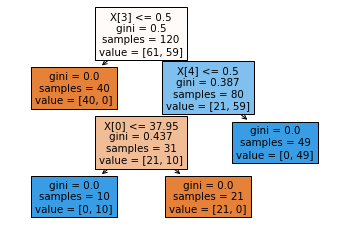

In [10]:
get_decision_tree_text_representation_and_plot(trainX, trainY1)

=======| DECISION TREE: TEXT REPRESENTATION |=======
|--- feature_0 <= 37.95
|   |--- class: 0
|--- feature_0 >  37.95
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- class: 1

=======| DECISION TREE: PLOT |=======


DecisionTreeClassifier(random_state=50)

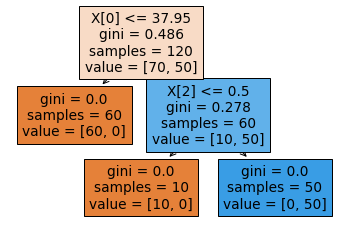

In [11]:
get_decision_tree_text_representation_and_plot(trainX, trainY2)

=======| DECISION TREE: TEXT REPRESENTATION |=======
|--- feature_0 <= 37.95
|   |--- feature_3 <= 0.50
|   |   |--- class: 0
|   |--- feature_3 >  0.50
|   |   |--- class: 1
|--- feature_0 >  37.95
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- feature_4 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_4 >  0.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: 0

=======| DECISION TREE: PLOT |=======


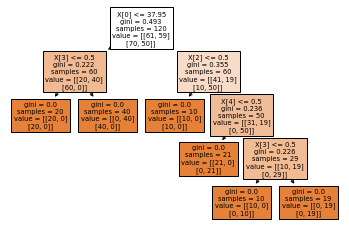

In [12]:
trainX = df.iloc[:, 0:6]
trainY = df.iloc[:, 6:]
trainY = trainY.astype('int')

classifier = get_decision_tree_text_representation_and_plot(trainX, trainY)

**1(c). Convert the decision rules into a set of IF-THEN rules.**

In [13]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print(f"{indent}if {name} <= {threshold}:")
            recurse(tree_.children_left[node], depth + 1)
            print(f"{indent}else:  # if {name} > {threshold}")
            recurse(tree_.children_right[node], depth + 1)
        else:
            print(f"{indent}return {tree_.value[node]}")

    recurse(0, 1)

In [14]:
tree_to_code(classifier, df.columns[0:6])

def tree(a1, a2, a3, a4, a5, a6):
  if a1 <= 37.95000076293945:
    if a4 <= 0.5:
      return [[20.  0.]
 [20.  0.]]
    else:  # if a4 > 0.5
      return [[ 0. 40.]
 [40.  0.]]
  else:  # if a1 > 37.95000076293945
    if a3 <= 0.5:
      return [[10.  0.]
 [10.  0.]]
    else:  # if a3 > 0.5
      if a5 <= 0.5:
        return [[21.  0.]
 [ 0. 21.]]
      else:  # if a5 > 0.5
        if a4 <= 0.5:
          return [[10.  0.]
 [ 0. 10.]]
        else:  # if a4 > 0.5
          return [[ 0. 19.]
 [ 0. 19.]]


**1(d). Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability.**

In [15]:
def get_parameters_for_pruning():
    ans = []
    for i in range(10):
        ans.append((i + 1) / 10)
    return ans

In [16]:
def get_best_score_and_params():
    parameters = {'max_depth': get_parameters_for_pruning()}
    classifier = GridSearchCV(DecisionTreeClassifier(random_state=50), parameters)
    classifier.fit(trainX, trainY)
    accurate_model = classifier.best_estimator_
    return {
        'best_score': round(classifier.best_score_, 4), 
        'best_params': classifier.best_params_,
        'accurate_model': accurate_model
    }

In [17]:
best_score_and_params_with_accurate_model = get_best_score_and_params()
best_score = best_score_and_params_with_accurate_model['best_score']
best_params = best_score_and_params_with_accurate_model['best_params']
accurate_model = best_score_and_params_with_accurate_model['accurate_model']
print(f"Best Score is {best_score}")
print(f"Best Params are {best_params}")

Best Score is 0.5417
Best Params are {'max_depth': 1.0}


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(trainX, trainY, test_size=0.20)

Train Accuracy = 1.0
Test Accuracy = 1.0


[Text(0.4, 0.9, 'X[0] <= 37.95\ngini = 0.491\nsamples = 96\nvalue = [[48, 48]\n[57, 39]]'),
 Text(0.2, 0.7, 'X[3] <= 0.5\ngini = 0.217\nsamples = 47\nvalue = [[15, 32]\n[47, 0]]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 15\nvalue = [[15, 0]\n[15, 0]]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 32\nvalue = [[0, 32]\n[32, 0]]'),
 Text(0.6, 0.7, 'X[2] <= 0.5\ngini = 0.382\nsamples = 49\nvalue = [[33, 16]\n[10, 39]]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.7, 0.5, 'X[4] <= 0.5\ngini = 0.242\nsamples = 39\nvalue = [[23, 16]\n[0, 39]]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 15\nvalue = [[15, 0]\n[0, 15]]'),
 Text(0.8, 0.3, 'X[3] <= 0.5\ngini = 0.222\nsamples = 24\nvalue = [[8, 16]\n[0, 24]]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 8\nvalue = [[8, 0]\n[0, 8]]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 16\nvalue = [[0, 16]\n[0, 16]]')]

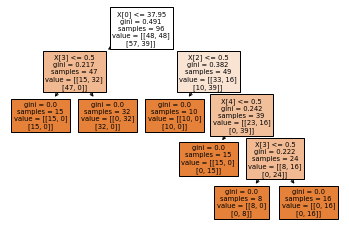

In [19]:
best_alpha=0.0
best_classifier = DecisionTreeClassifier(random_state=50, ccp_alpha=best_alpha)
best_c = LabelPowerset(best_classifier)
best_classifier.fit(X_train, Y_train)
Y_train_pred = best_classifier.predict(X_train)
Y_test_pred = best_classifier.predict(X_test)

print(f"Train Accuracy = {accuracy_score(Y_train, Y_train_pred)}")
print(f"Test Accuracy = {accuracy_score(Y_test, Y_test_pred)}")
tree.plot_tree(best_classifier, filled=True)

In [20]:
tree_to_code(best_classifier, df.columns[0:6])

def tree(a1, a2, a3, a4, a5, a6):
  if a1 <= 37.95000076293945:
    if a4 <= 0.5:
      return [[15.  0.]
 [15.  0.]]
    else:  # if a4 > 0.5
      return [[ 0. 32.]
 [32.  0.]]
  else:  # if a1 > 37.95000076293945
    if a3 <= 0.5:
      return [[10.  0.]
 [10.  0.]]
    else:  # if a3 > 0.5
      if a5 <= 0.5:
        return [[15.  0.]
 [ 0. 15.]]
      else:  # if a5 > 0.5
        if a4 <= 0.5:
          return [[8. 0.]
 [0. 8.]]
        else:  # if a4 > 0.5
          return [[ 0. 16.]
 [ 0. 16.]]


In [21]:
def get_decision_rules_with_high_interpretability():
    features = ['temperature', 'nausea_occurence', 'lumbar_pain', 'urine_pushing', 'micturition_pains', 'burning_urethra']
    features_d1_d2 = ['inflammation_pred', 'nephritis_pred']
    dot_data = tree.export_graphviz(accurate_model, out_file=None, 
                                    feature_names=features,  
                                    class_names=features_d1_d2,
                                    filled=True)
    tree.plot_tree(accurate_model)
    return features

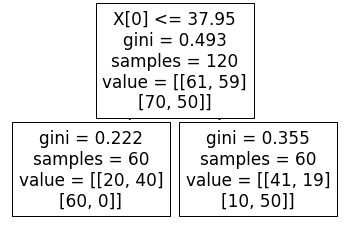

In [22]:
# DOT Data
features = get_decision_rules_with_high_interpretability()

In [23]:
tree_to_code(accurate_model, features)

def tree(temperature, nausea_occurence, lumbar_pain, urine_pushing, micturition_pains, burning_urethra):
  if temperature <= 37.95000076293945:
    return [[20. 40.]
 [60.  0.]]
  else:  # if temperature > 37.95000076293945
    return [[41. 19.]
 [10. 50.]]


## Communities and Crime Data

### The LASSO and Boosting for Regression

**2(a). Download the Communities and Crime data from https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data as the training set and the rest as the test set.**

In [24]:
CRIME_DATA = "../data/communities_data.csv"
CRIME_DATA_COLS = "../data/communities_names.txt"

In [25]:
def get_columns_crime_data(filename):
    cols = []
    if 'communities' in filename:
        file = open(filename)
        for line in file:
            if "@attribute" in line:
                line = line.split(" ")
                cols.append(line[1])
        return cols;

In [26]:
cols = get_columns_crime_data(CRIME_DATA_COLS)
df = pd.read_csv(CRIME_DATA, header=None, na_values='?')
df.columns = cols
df

state  county  community        communityname  fold  population  \
0         8     NaN        NaN         Lakewoodcity     1        0.19   
1        53     NaN        NaN          Tukwilacity     1        0.00   
2        24     NaN        NaN         Aberdeentown     1        0.00   
3        34     5.0    81440.0  Willingborotownship     1        0.04   
4        42    95.0     6096.0    Bethlehemtownship     1        0.01   
...     ...     ...        ...                  ...   ...         ...   
1989     12     NaN        NaN    TempleTerracecity    10        0.01   
1990      6     NaN        NaN          Seasidecity    10        0.05   
1991      9     9.0    80070.0        Waterburytown    10        0.16   
1992     25    17.0    72600.0          Walthamcity    10        0.08   
1993      6     NaN        NaN          Ontariocity    10        0.20   

      householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0              0.33          0.02          0.90          0.12  ...      0.12   
1              0.16          0.12          0.74          0.45  ...      0.02   
2              0.42          0.49          0.56          0.17  ...      0.01   
3              0.77          1.00          0.08          0.12  ...      0.02   
4              0.55          0.02          0.95          0.09  ...      0.04   
...             ...           ...           ...           ...  ...       ...   
1989           0.40          0.10          0.87          0.12  ...      0.01   
1990           0.96          0.46          0.28          0.83  ...      0.02   
1991           0.37          0.25          0.69          0.04  ...      0.08   
1992           0.51          0.06          0.87          0.22  ...      0.03   
1993           0.78          0.14          0.46          0.24  ...      0.11   

      PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0        0.26            0.20       0.06           0.04                 0.90   
1        0.12            0.45        NaN            NaN                  NaN   
2        0.21            0.02        NaN            NaN                  NaN   
3        0.39            0.28        NaN            NaN                  NaN   
4        0.09            0.02        NaN            NaN                  NaN   
...       ...             ...        ...            ...                  ...   
1989     0.28            0.05        NaN            NaN                  NaN   
1990     0.37            0.20        NaN            NaN                  NaN   
1991     0.32            0.18       0.08           0.06                 0.78   
1992     0.38            0.33       0.02           0.02                 0.79   
1993     0.30            0.05       0.08           0.04                 0.73   

      LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
0                     0.5                 0.32             0.14   
1                     NaN                 0.00              NaN   
2                     NaN                 0.00              NaN   
3                     NaN                 0.00              NaN   
4                     NaN                 0.00              NaN   
...                   ...                  ...              ...   
1989                  NaN                 0.00              NaN   
1990                  NaN                 0.00              NaN   
1991                  0.0                 0.91             0.28   
1992                  0.0                 0.22             0.18   
1993                  0.5                 1.00             0.13   

      ViolentCrimesPerPop  
0                    0.20  
1                    0.67  
2                    0.43  
3                    0.12  
4                    0.03  
...                   ...  
1989                 0.09  
1990                 0.45  
1991                 0.23  
1992                 0.19  
1993                 0.48  

[1994 rows x 128 columns]

In [27]:
def get_train_test_split(df):
    train_df = df.iloc[:1495,:]
    test_df = df.iloc[1495:, :]
    return (train_df, test_df)

In [28]:
train_df, test_df = get_train_test_split(df)
train_df

state  county  community        communityname  fold  population  \
0         8     NaN        NaN         Lakewoodcity     1        0.19   
1        53     NaN        NaN          Tukwilacity     1        0.00   
2        24     NaN        NaN         Aberdeentown     1        0.00   
3        34     5.0    81440.0  Willingborotownship     1        0.04   
4        42    95.0     6096.0    Bethlehemtownship     1        0.01   
...     ...     ...        ...                  ...   ...         ...   
1490      6     NaN        NaN     Hillsboroughtown     8        0.00   
1491      6     NaN        NaN           Orangecity     8        0.16   
1492     13     NaN        NaN         Waycrosscity     8        0.01   
1493     39    85.0    49056.0           Mentorcity     8        0.06   
1494     34    17.0    79610.0      WestNewYorktown     8        0.05   

      householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0              0.33          0.02          0.90          0.12  ...      0.12   
1              0.16          0.12          0.74          0.45  ...      0.02   
2              0.42          0.49          0.56          0.17  ...      0.01   
3              0.77          1.00          0.08          0.12  ...      0.02   
4              0.55          0.02          0.95          0.09  ...      0.04   
...             ...           ...           ...           ...  ...       ...   
1490           0.59          0.01          0.69          1.00  ...      0.02   
1491           0.62          0.03          0.74          0.48  ...      0.07   
1492           0.36          0.95          0.24          0.03  ...      0.03   
1493           0.53          0.01          0.98          0.05  ...      0.08   
1494           0.43          0.08          0.65          0.12  ...      0.00   

      PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0        0.26            0.20       0.06           0.04                 0.90   
1        0.12            0.45        NaN            NaN                  NaN   
2        0.21            0.02        NaN            NaN                  NaN   
3        0.39            0.28        NaN            NaN                  NaN   
4        0.09            0.02        NaN            NaN                  NaN   
...       ...             ...        ...            ...                  ...   
1490     0.14            0.22        NaN            NaN                  NaN   
1491     0.40            0.14       0.07           0.05                 0.85   
1492     0.12            0.01        NaN            NaN                  NaN   
1493     0.15            0.02        NaN            NaN                  NaN   
1494     1.00            1.00       0.00           0.01                 0.77   

      LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
0                     0.5                 0.32             0.14   
1                     NaN                 0.00              NaN   
2                     NaN                 0.00              NaN   
3                     NaN                 0.00              NaN   
4                     NaN                 0.00              NaN   
...                   ...                  ...              ...   
1490                  NaN                 0.00              NaN   
1491                  0.5                 0.61             0.19   
1492                  NaN                 0.00              NaN   
1493                  NaN                 0.00              NaN   
1494                  0.0                 0.51             0.18   

      ViolentCrimesPerPop  
0                    0.20  
1                    0.67  
2                    0.43  
3                    0.12  
4                    0.03  
...                   ...  
1490                 0.03  
1491                 0.20  
1492                 0.30  
1493                 0.03  
1494                 0.23  

[1495 rows x 128 columns]

In [29]:
test_df

state  county  community      communityname  fold  population  \
1495      6     NaN        NaN     MillValleycity     8        0.00   
1496     48     NaN        NaN        LiveOakcity     8        0.00   
1497     35     NaN        NaN       Portalescity     8        0.00   
1498     42    17.0    25112.0      Fallstownship     8        0.04   
1499     51   683.0    48952.0       Manassascity     8        0.03   
...     ...     ...        ...                ...   ...         ...   
1989     12     NaN        NaN  TempleTerracecity    10        0.01   
1990      6     NaN        NaN        Seasidecity    10        0.05   
1991      9     9.0    80070.0      Waterburytown    10        0.16   
1992     25    17.0    72600.0        Walthamcity    10        0.08   
1993      6     NaN        NaN        Ontariocity    10        0.20   

      householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
1495           0.20          0.03          0.91          0.23  ...      0.01   
1496           0.55          0.13          0.78          0.15  ...      0.01   
1497           0.52          0.04          0.59          0.05  ...      0.01   
1498           0.51          0.07          0.92          0.09  ...      0.06   
1499           0.59          0.20          0.75          0.19  ...      0.03   
...             ...           ...           ...           ...  ...       ...   
1989           0.40          0.10          0.87          0.12  ...      0.01   
1990           0.96          0.46          0.28          0.83  ...      0.02   
1991           0.37          0.25          0.69          0.04  ...      0.08   
1992           0.51          0.06          0.87          0.22  ...      0.03   
1993           0.78          0.14          0.46          0.24  ...      0.11   

      PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
1495     0.23            0.73        NaN            NaN                  NaN   
1496     0.18            0.02        NaN            NaN                  NaN   
1497     0.18            0.00        NaN            NaN                  NaN   
1498     0.13            0.16        NaN            NaN                  NaN   
1499     0.23            0.06        NaN            NaN                  NaN   
...       ...             ...        ...            ...                  ...   
1989     0.28            0.05        NaN            NaN                  NaN   
1990     0.37            0.20        NaN            NaN                  NaN   
1991     0.32            0.18       0.08           0.06                 0.78   
1992     0.38            0.33       0.02           0.02                 0.79   
1993     0.30            0.05       0.08           0.04                 0.73   

      LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
1495                  NaN                 0.00              NaN   
1496                  NaN                 0.00              NaN   
1497                  NaN                 0.00              NaN   
1498                  NaN                 0.00              NaN   
1499                  NaN                 0.00              NaN   
...                   ...                  ...              ...   
1989                  NaN                 0.00              NaN   
1990                  NaN                 0.00              NaN   
1991                  0.0                 0.91             0.28   
1992                  0.0                 0.22             0.18   
1993                  0.5                 1.00             0.13   

      ViolentCrimesPerPop  
1495                 0.12  
1496                 0.11  
1497                 0.12  
1498                 0.06  
1499                 0.12  
...                   ...  
1989                 0.09  
1990                 0.45  
1991                 0.23  
1992                 0.19  
1993                 0.48  

[499 rows x 128 columns]

**2(b). The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.**

In [30]:
# 1st 5 features are non-predictive. Hence, removing them from all dataframes
df = df.iloc[:, 5:]
train_df = train_df.iloc[:, 5:]
test_df = test_df.iloc[:, 5:]

In [31]:
train_df

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1490        0.00           0.59          0.01          0.69          1.00   
1491        0.16           0.62          0.03          0.74          0.48   
1492        0.01           0.36          0.95          0.24          0.03   
1493        0.06           0.53          0.01          0.98          0.05   
1494        0.05           0.43          0.08          0.65          0.12   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0            0.17         0.34         0.47         0.29        0.32  ...   
1            0.07         0.26         0.59         0.35        0.27  ...   
2            0.04         0.39         0.47         0.28        0.32  ...   
3            0.10         0.51         0.50         0.34        0.21  ...   
4            0.05         0.38         0.38         0.23        0.36  ...   
...           ...          ...          ...          ...         ...  ...   
1490         0.07         0.41         0.28         0.23        0.57  ...   
1491         0.42         0.44         0.57         0.40        0.25  ...   
1492         0.01         0.44         0.42         0.27        0.63  ...   
1493         0.01         0.40         0.40         0.24        0.29  ...   
1494         1.00         0.37         0.52         0.33        0.44  ...   

      LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
0         0.12     0.26            0.20       0.06           0.04   
1         0.02     0.12            0.45        NaN            NaN   
2         0.01     0.21            0.02        NaN            NaN   
3         0.02     0.39            0.28        NaN            NaN   
4         0.04     0.09            0.02        NaN            NaN   
...        ...      ...             ...        ...            ...   
1490      0.02     0.14            0.22        NaN            NaN   
1491      0.07     0.40            0.14       0.07           0.05   
1492      0.03     0.12            0.01        NaN            NaN   
1493      0.08     0.15            0.02        NaN            NaN   
1494      0.00     1.00            1.00       0.00           0.01   

      LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
0                    0.90                  0.5                 0.32   
1                     NaN                  NaN                 0.00   
2                     NaN                  NaN                 0.00   
3                     NaN                  NaN                 0.00   
4                     NaN                  NaN                 0.00   
...                   ...                  ...                  ...   
1490                  NaN                  NaN                 0.00   
1491                 0.85                  0.5                 0.61   
1492                  NaN                  NaN                 0.00   
1493                  NaN                  NaN                 0.00   
1494                 0.77                  0.0                 0.51   

      PolicBudgPerPop  ViolentCrimesPerPop  
0                0.14                 0.20  
1                 NaN                 0.67  
2                 NaN                 0.43  
3                 NaN                 0.12  
4                 NaN                 0.03  
...               ...                  ...  
1490              NaN                 0.03  
1491             0.19                 0.20  
1492              NaN                 0.30  
1493              NaN   

In [32]:
test_df

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
1495        0.00           0.20          0.03          0.91          0.23   
1496        0.00           0.55          0.13          0.78          0.15   
1497        0.00           0.52          0.04          0.59          0.05   
1498        0.04           0.51          0.07          0.92          0.09   
1499        0.03           0.59          0.20          0.75          0.19   
...          ...            ...           ...           ...           ...   
1989        0.01           0.40          0.10          0.87          0.12   
1990        0.05           0.96          0.46          0.28          0.83   
1991        0.16           0.37          0.25          0.69          0.04   
1992        0.08           0.51          0.06          0.87          0.22   
1993        0.20           0.78          0.14          0.46          0.24   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
1495         0.05         0.15         0.19         0.09        0.42  ...   
1496         0.36         0.48         0.53         0.30        0.10  ...   
1497         0.62         0.84         0.78         0.75        0.43  ...   
1498         0.03         0.38         0.47         0.27        0.35  ...   
1499         0.10         0.38         0.62         0.35        0.11  ...   
...           ...          ...          ...          ...         ...  ...   
1989         0.16         0.43         0.51         0.35        0.30  ...   
1990         0.32         0.69         0.86         0.73        0.14  ...   
1991         0.25         0.35         0.50         0.31        0.54  ...   
1992         0.10         0.58         0.74         0.63        0.41  ...   
1993         0.77         0.50         0.62         0.40        0.17  ...   

      LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
1495      0.01     0.23            0.73        NaN            NaN   
1496      0.01     0.18            0.02        NaN            NaN   
1497      0.01     0.18            0.00        NaN            NaN   
1498      0.06     0.13            0.16        NaN            NaN   
1499      0.03     0.23            0.06        NaN            NaN   
...        ...      ...             ...        ...            ...   
1989      0.01     0.28            0.05        NaN            NaN   
1990      0.02     0.37            0.20        NaN            NaN   
1991      0.08     0.32            0.18       0.08           0.06   
1992      0.03     0.38            0.33       0.02           0.02   
1993      0.11     0.30            0.05       0.08           0.04   

      LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
1495                  NaN                  NaN                 0.00   
1496                  NaN                  NaN                 0.00   
1497                  NaN                  NaN                 0.00   
1498                  NaN                  NaN                 0.00   
1499                  NaN                  NaN                 0.00   
...                   ...                  ...                  ...   
1989                  NaN                  NaN                 0.00   
1990                  NaN                  NaN                 0.00   
1991                 0.78                  0.0                 0.91   
1992                 0.79                  0.0                 0.22   
1993                 0.73                  0.5                 1.00   

      PolicBudgPerPop  ViolentCrimesPerPop  
1495              NaN                 0.12  
1496              NaN                 0.11  
1497              NaN                 0.12  
1498              NaN                 0.06  
1499              NaN                 0.12  
...               ...                  ...  
1989              NaN                 0.09  
1990              NaN                 0.45  
1991             0.28                 0.23  
1992             0.18   

In [33]:
# using mean as a data imputation technique
def get_cols_to_imputate(df):
    imputated_df = df.isna().mean().round(5).mul(100).sort_values(ascending=False)
    cols_to_imputate = imputated_df[imputated_df > 0].index
    return cols_to_imputate


In [34]:
cols_to_imputate = get_cols_to_imputate(df)
cols_to_imputate_df = pd.DataFrame(cols_to_imputate)
cols_to_imputate_df.columns = ['Columns to Imputate']
cols_to_imputate_df

Columns to Imputate
0       PolicReqPerOffic
1          PctPolicMinor
2           LemasSwornFT
3        LemasSwFTPerPop
4      LemasSwFTFieldOps
5   LemasSwFTFieldPerPop
6          LemasTotalReq
7      LemasTotReqPerPop
8            PolicPerPop
9     RacialMatchCommPol
10         PctPolicWhite
11         PctPolicBlack
12         PctPolicAsian
13          PctPolicHisp
14   OfficAssgnDrugUnits
15             PolicCars
16       PolicBudgPerPop
17   LemasGangUnitDeploy
18   LemasPctPolicOnPatr
19     NumKindsDrugsSeiz
20         PolicOperBudg
21      PolicAveOTWorked
22           OtherPerCap

In [35]:
def impute(df):
    imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
    for col in cols_to_imputate:
        imputer = imputer.fit(train_df[[col]])
        train_df[[col]] = imputer.transform(train_df[[col]])
        test_df[[col]] = imputer.transform(test_df[[col]])
    df_imputed=pd.concat([train_df,test_df])
    return df_imputed

In [36]:
df_imputed = impute(df)
df_imputed

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1989        0.01           0.40          0.10          0.87          0.12   
1990        0.05           0.96          0.46          0.28          0.83   
1991        0.16           0.37          0.25          0.69          0.04   
1992        0.08           0.51          0.06          0.87          0.22   
1993        0.20           0.78          0.14          0.46          0.24   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0            0.17         0.34         0.47         0.29        0.32  ...   
1            0.07         0.26         0.59         0.35        0.27  ...   
2            0.04         0.39         0.47         0.28        0.32  ...   
3            0.10         0.51         0.50         0.34        0.21  ...   
4            0.05         0.38         0.38         0.23        0.36  ...   
...           ...          ...          ...          ...         ...  ...   
1989         0.16         0.43         0.51         0.35        0.30  ...   
1990         0.32         0.69         0.86         0.73        0.14  ...   
1991         0.25         0.35         0.50         0.31        0.54  ...   
1992         0.10         0.58         0.74         0.63        0.41  ...   
1993         0.77         0.50         0.62         0.40        0.17  ...   

      LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
0         0.12     0.26            0.20   0.060000       0.040000   
1         0.02     0.12            0.45   0.163975       0.080502   
2         0.01     0.21            0.02   0.163975       0.080502   
3         0.02     0.39            0.28   0.163975       0.080502   
4         0.04     0.09            0.02   0.163975       0.080502   
...        ...      ...             ...        ...            ...   
1989      0.01     0.28            0.05   0.163975       0.080502   
1990      0.02     0.37            0.20   0.163975       0.080502   
1991      0.08     0.32            0.18   0.080000       0.060000   
1992      0.03     0.38            0.33   0.020000       0.020000   
1993      0.11     0.30            0.05   0.080000       0.040000   

      LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
0                0.900000             0.500000                 0.32   
1                0.713054             0.451883                 0.00   
2                0.713054             0.451883                 0.00   
3                0.713054             0.451883                 0.00   
4                0.713054             0.451883                 0.00   
...                   ...                  ...                  ...   
1989             0.713054             0.451883                 0.00   
1990             0.713054             0.451883                 0.00   
1991             0.780000             0.000000                 0.91   
1992             0.790000             0.000000                 0.22   
1993             0.730000             0.500000                 1.00   

      PolicBudgPerPop  ViolentCrimesPerPop  
0            0.140000                 0.20  
1            0.190753                 0.67  
2            0.190753                 0.43  
3            0.190753                 0.12  
4            0.190753                 0.03  
...               ...                  ...  
1989         0.190753                 0.09  
1990         0.190753                 0.45  
1991         0.280000                 0.23  
1992         0.180000   

**2(c). Plot a correlation matrix for the features in the data set.**

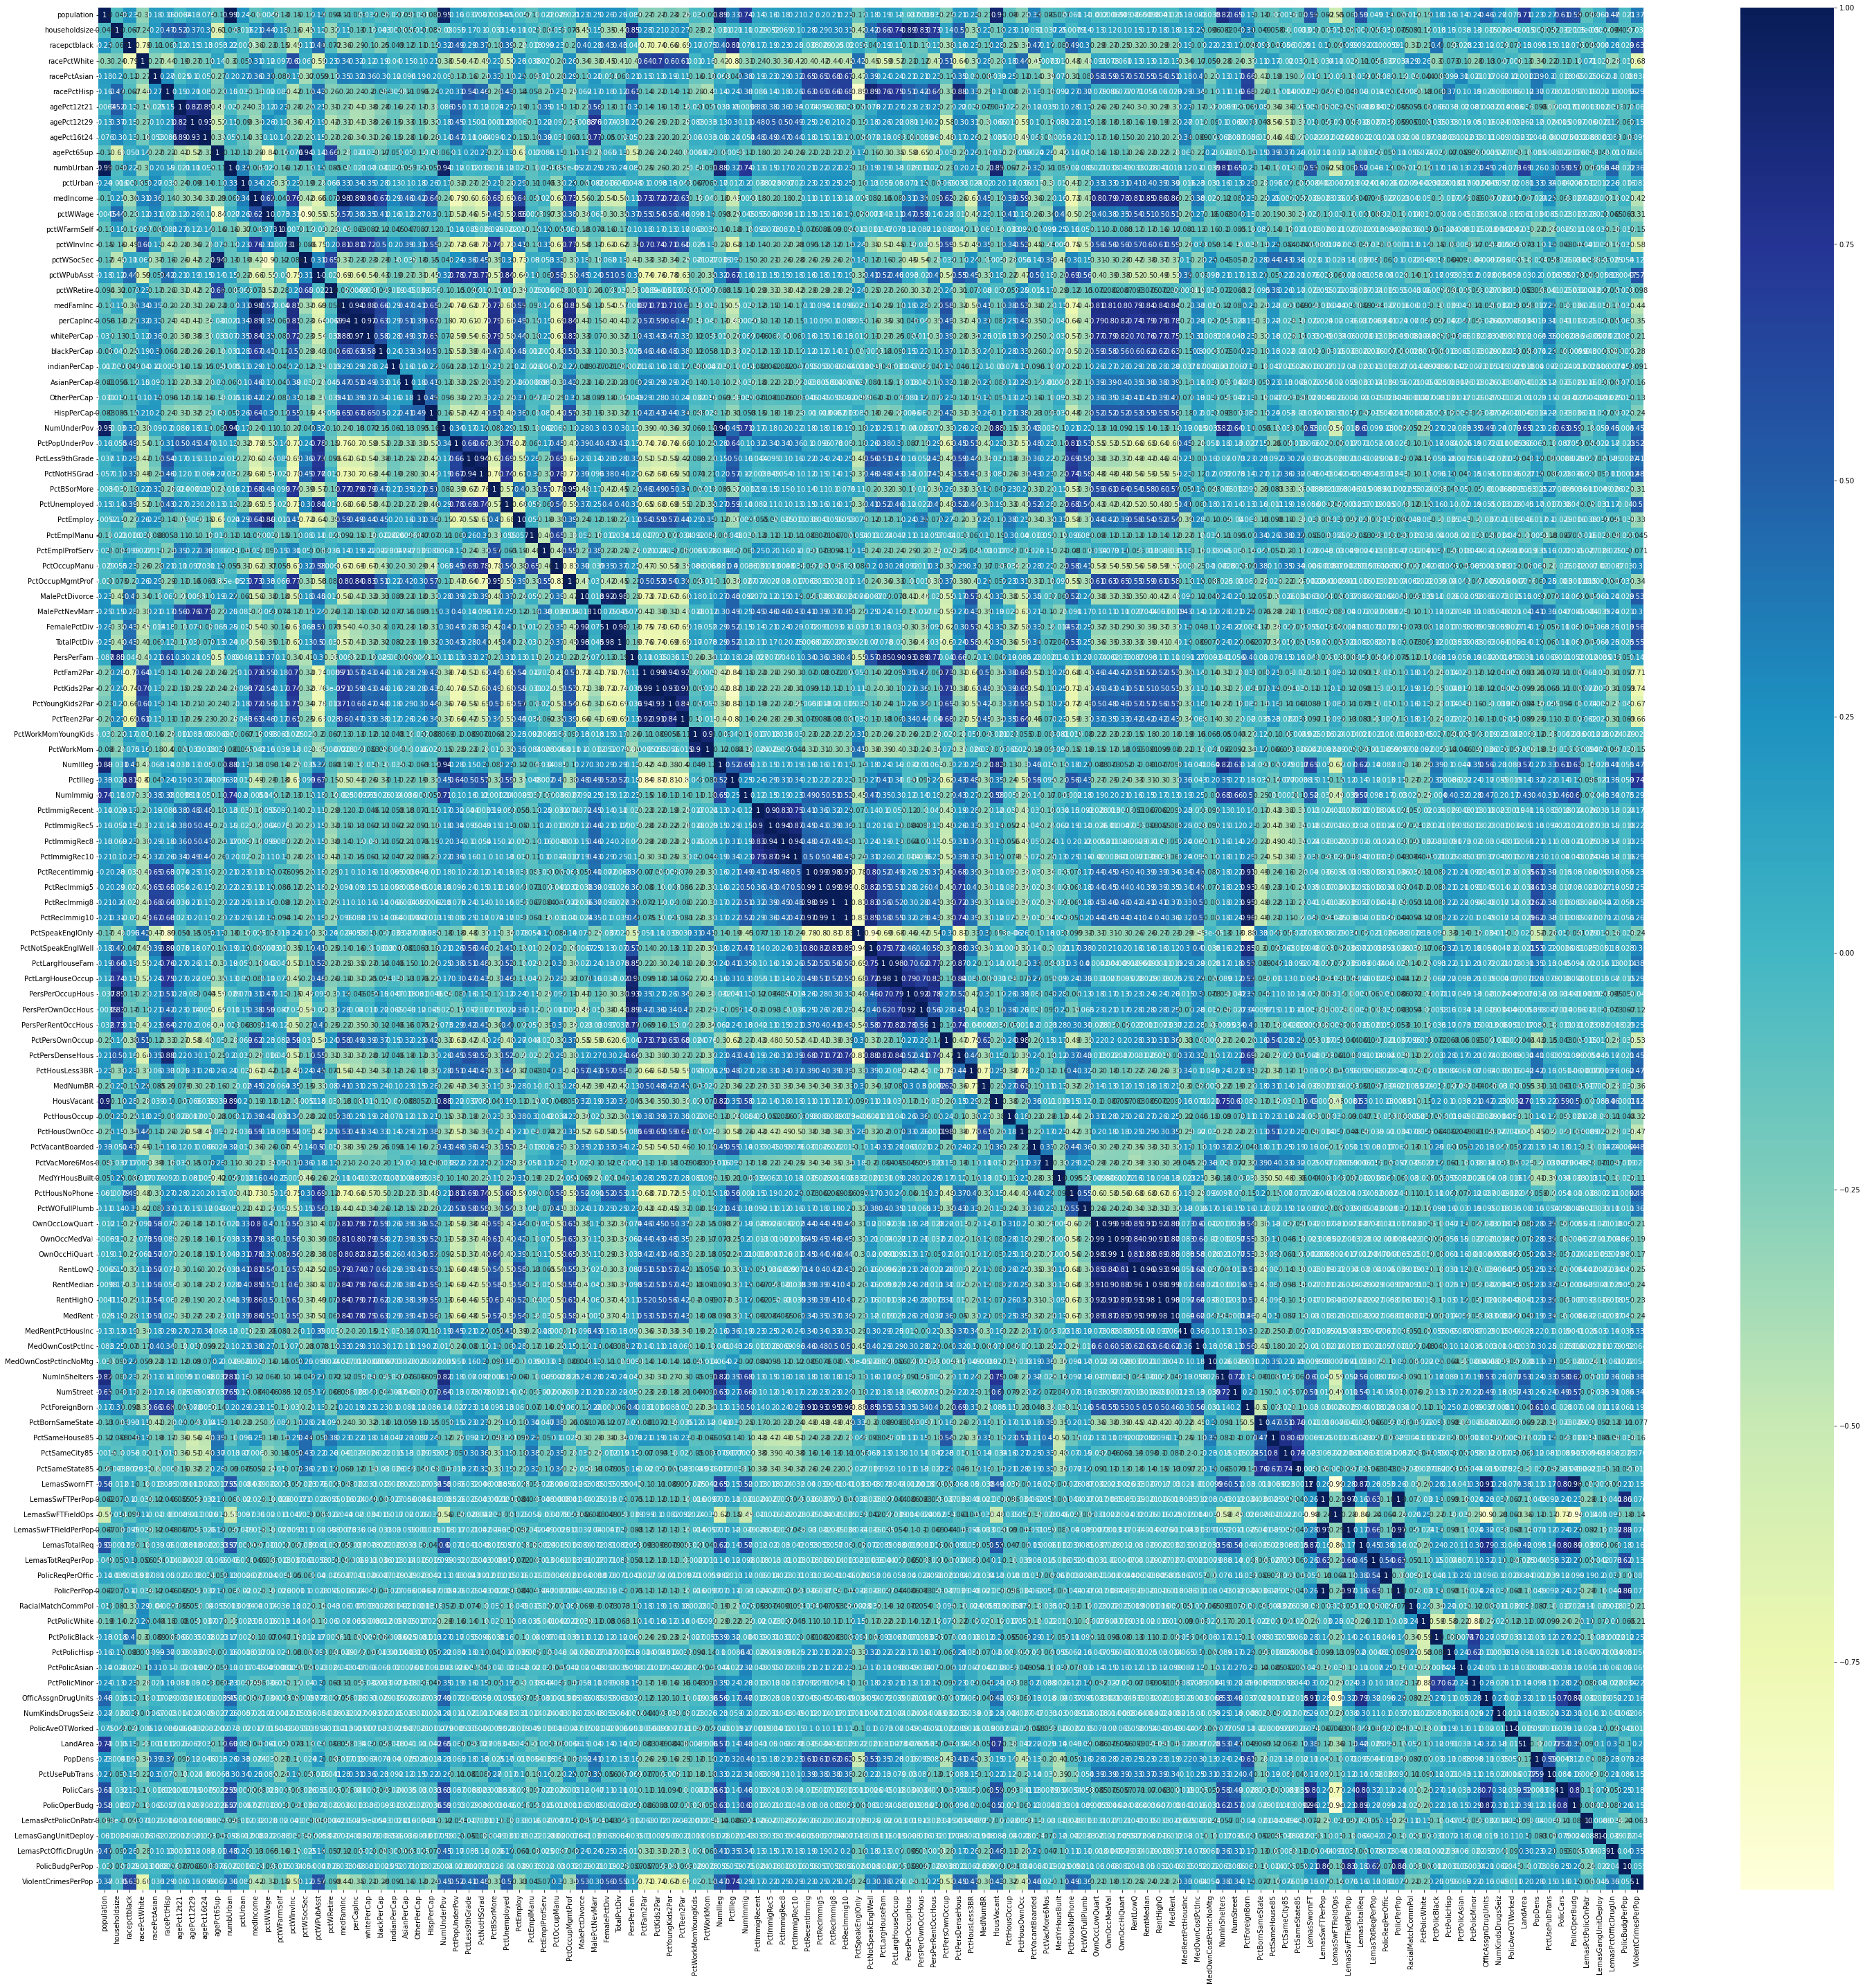

In [37]:
plt.figure(figsize=(50, 50))
corr = df_imputed.corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

**2(d). Calculate the Coefficient of Variation CV for each feature, where $CV = s/m$, which $s$ is sample standard deviation and $m$ is sample mean.**

In [38]:
def calculate_cv(df):
    describe = df_imputed.describe(include='all')
    std = describe.loc['std']
    mean = describe.loc['mean']
    describe.loc['CV'] = std / mean
    return describe.loc[['std','mean','CV']]

In [39]:
cv_features = calculate_cv(df)
cv_features

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
std     0.126906       0.163717      0.253442      0.244039      0.208877   
mean    0.057593       0.463395      0.179629      0.753716      0.153681   
CV      2.203503       0.353298      1.410920      0.323782      1.359162   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
std      0.232492     0.155196     0.143564     0.166505    0.179185  ...   
mean     0.144022     0.424218     0.493867     0.336264    0.423164  ...   
CV       1.614278     0.365840     0.290693     0.495161    0.423442  ...   

      LandArea   PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
std   0.109459  0.203092        0.229055   0.085793       0.056023   
mean  0.065231  0.232854        0.161685   0.163835       0.079895   
CV    1.678031  0.872187        1.416673   0.523655       0.701202   

      LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
std              0.085624             0.162153             0.240328   
mean             0.710740             0.450052             0.094052   
CV               0.120471             0.360299             2.555266   

      PolicBudgPerPop  ViolentCrimesPerPop  
std          0.065815             0.232985  
mean         0.191445             0.237979  
CV           0.343782             0.979015  

[3 rows x 123 columns]

**2(e). Pick $b=\sqrt{128}$ features with highest $CV$, and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?**

In [40]:
def get_top_features_with_highest_cv(df):    
    print("=======| Top Features with Highest CV |=======")
    end = int(np.sqrt(128))
    top_cv_features = cv_features.loc['CV'].sort_values(ascending=False)
    top_cv_features = top_cv_features[:end]
    return top_cv_features

In [41]:
top_cv_features = get_top_features_with_highest_cv(cv_features)
top_cv_features

=======| Top Features with Highest CV |=======


NumStreet              4.407702
NumInShelters          3.485481
NumIlleg               2.994196
NumImmig               2.900497
LemasPctOfficDrugUn    2.555266
NumUnderPov            2.304970
population             2.203503
numbUrban              2.001744
HousVacant             1.958780
LandArea               1.678031
racePctHisp            1.614278
Name: CV, dtype: float64

In [42]:
def get_pairplot(df):
    sns.pairplot(df[top_cv_features.index])
    plt.show()

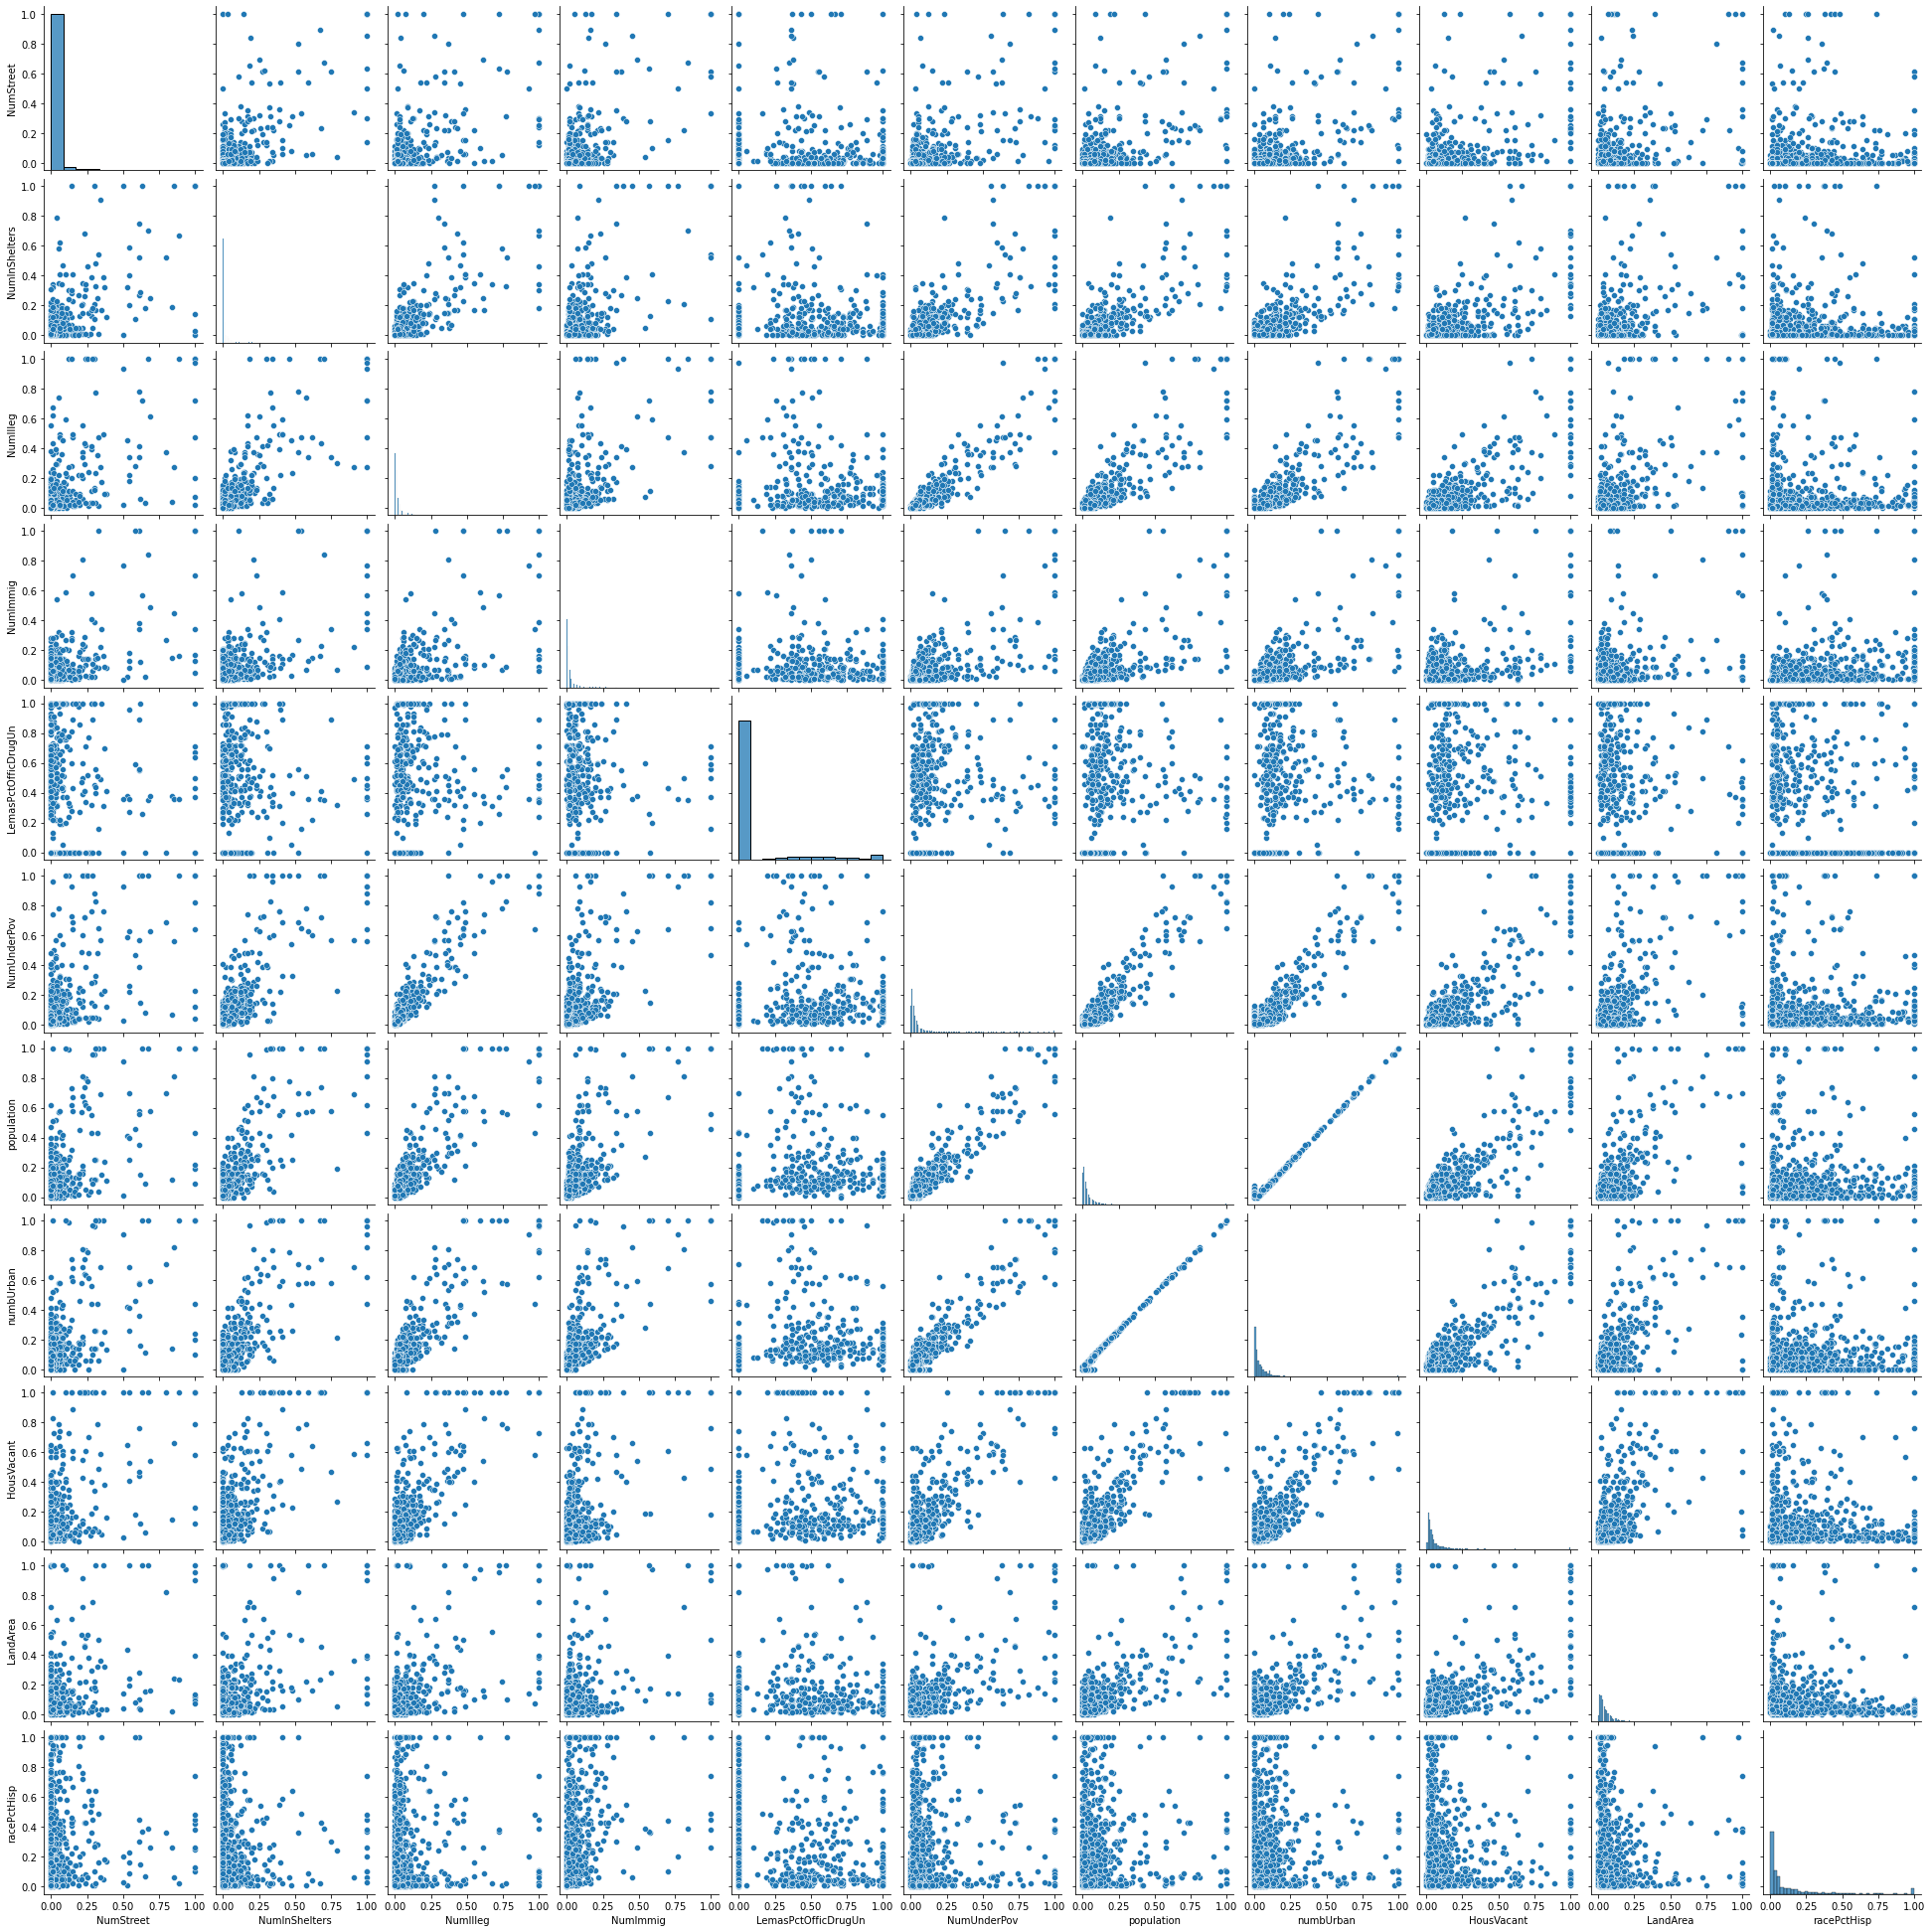

In [43]:
get_pairplot(df_imputed)

In [44]:
def plot_scatter_plots(df):
    count = len(top_cv_features)
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(top_cv_features.index):
        plt.subplot(6, 2, i + 1)
        sns.boxplot(x=col, data=df)
    plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.6)

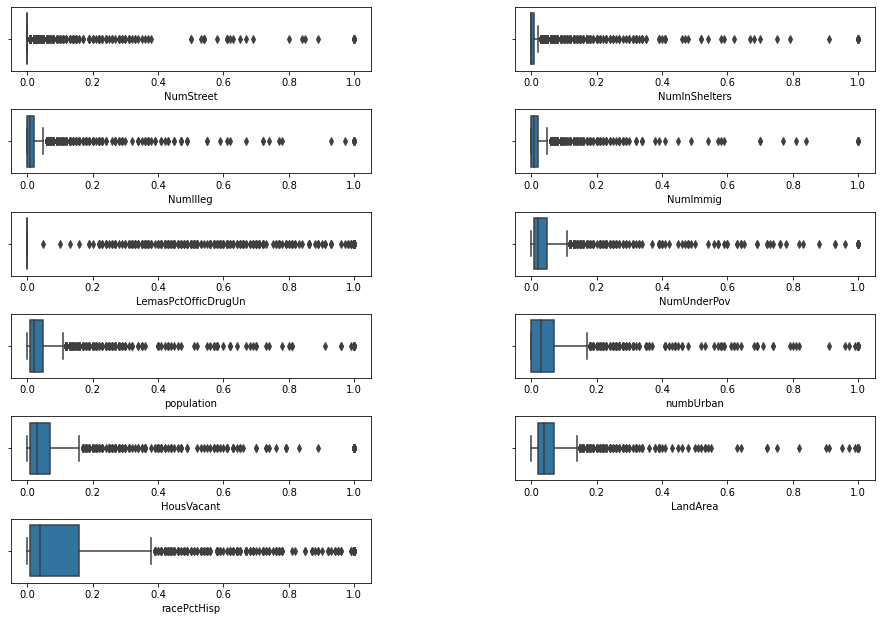

In [45]:
plot_scatter_plots(df_imputed)

**Observations:**
> The scatteplots are truely scattered and it seems that no conclusion can be drawn solely from the scatterplot alone. However, combining a scatterplot with a boxplot seems to provide some insight esp when the datapoints increase.

**2(f). Fit a linear model using least squares to the training set and report the test error.**

In [46]:
def get_X_Y_split(df):
    x_data = df.iloc[:, :-1]
    y_data = df.iloc[:, -1:]
    return x_data, y_data

In [47]:
train_X, train_Y = get_X_Y_split(train_df)
test_X, test_Y = get_X_Y_split(test_df)

In [48]:
def get_test_error(trainX, trainY, testX, testY):
    train_sm = sm.add_constant(trainX)
    model = sm.OLS(trainY, train_sm).fit()
    predicted_dataY = model.predict(train_sm)
    display(model.summary())
    mse_train = mean_squared_error(trainY, predicted_dataY)
    
    test_sm = sm.add_constant(testX)
    predicted_dataY_test = model.predict(test_sm)
    mse_test = mean_squared_error(testY, predicted_dataY_test)
    return round(mse_train, 4), round(mse_test, 4)

In [49]:
train_mse, test_mse = get_test_error(train_X, train_Y, test_X, test_Y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.711
Model:                             OLS   Adj. R-squared:                  0.686
Method:                  Least Squares   F-statistic:                     27.94
Date:                 Fri, 28 Oct 2022   Prob (F-statistic):          6.56e-291
Time:                         19:09:08   Log-Likelihood:                 955.40
No. Observations:                 1495   AIC:                            -1667.
Df Residuals:                     1373   BIC:                            -1019.
Df Model:                          121                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.4544      0.904      0.503      0.615      -1.319       2.228
population               -0.0199      0.477     -0.042      0.967      -0.955       0.916
householdsize            -0.0157      0.098     -0.161      0.872      -0.207       0.176
racepctblack              0.2848      0.060      4.754      0.000       0.167       0.402
racePctWhite              0.0106      0.067      0.159      0.874      -0.120       0.141
racePctAsian             -0.0278      0.041     -0.670      0.503      -0.109       0.054
racePctHisp               0.0180      0.065      0.275      0.784      -0.110       0.146
agePct12t21               0.1792      0.129      1.387      0.166      -0.074       0.433
agePct12t29              -0.3451      0.186     -1.858      0.063      -0.709       0.019
agePct16t24              -0.1237      0.198     -0.626      0.531      -0.511       0.264
agePct65up                0.0597      0.124      0.481      0.630      -0.184       0.303
numbUrban                -0.1260      0.465     -0.271      0.786      -1.038       0.786
pctUrban                  0.0484      0.019      2.581      0.010       0.012       0.085
medIncome                -0.1784      0.202     -0.881      0.378      -0.575       0.219
pctWWage                 -0.1399      0.107     -1.309      0.191      -0.350       0.070
pctWFarmSelf              0.0460      0.023      1.960      0.050   -3.35e-05       0.092
pctWInvInc               -0.2031      0.081     -2.505      0.012      -0.362      -0.044
pctWSocSec                0.1368      0.125      1.092      0.275      -0.109       0.383
pctWPubAsst               0.0601      0.054      1.109      0.268      -0.046       0.166
pctWRetire               -0.1249      0.045     -2.802      0.005      -0.212      -0.037
medFamInc                 0.3049      0.189      1.617      0.106      -0.065       0.675
perCapInc                -0.0485      0.222     -0.219      0.827      -0.484       0.387
whitePerCap              -0.1923      0.179     -1.072      0.284      -0.544       0.160
blackPerCap              -0.0401      0.030     -1.358      0.175      -0.098       0.018
indianPerCap             -0.0436      0.023     -1.911      0.056      -0.088       0.001
AsianPerCap               0.0301      0.022      1.381      0.168      -0.013       0.073
OtherPerCap               0.0304      0.022      1.364      0.173      -0.013       0.074
HispPerCap                0.0330      0.029      1.150      0.250      -0.023       0.089
NumUnderPov               0.0737      0.192      0.383      0.702      -0.303       0.451
PctPopUnderPov           -0.2035      0.074     -2.736      0.006      -0.349      -0.058
PctLess9thGrade          -0.0584      0.079     -0.743      0.457      -0.213       0.096
PctNotHSGrad

In [50]:
data = {
    "Train Mean Squared Error": [train_mse],
    "Test Mean Squared Error": [test_mse]
}
print(data)
mse_df = pd.DataFrame(data)
mse_df

{'Train Mean Squared Error': [0.0163], 'Test Mean Squared Error': [0.0181]}


Train Mean Squared Error  Test Mean Squared Error
0                    0.0163                   0.0181

**2(g). Fit a ridge regression model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained.**

In [51]:
alphas = []
def get_alphas():
    for i in range(-10, 11, 1):
        alphas.append(10**i)
    return alphas

In [52]:
rr = RidgeCV(alphas=get_alphas(),
             cv=KFold(n_splits=5, random_state=1, shuffle=True),
             scoring='neg_mean_squared_error')
rr.fit(train_X, train_Y)
print("Model info:", rr)

predicted_Y = rr.predict(test_X)
chosen_alpha = rr.alpha_
test_mse = mean_squared_error(test_Y,predicted_Y)
test_r2 = r2_score(test_Y,predicted_Y)

stats = {
    "Chosen Alpha": [chosen_alpha],
    "Test MSE": [test_mse],
    "Test R2": [test_r2]
}

stats_df = pd.DataFrame(stats)
stats_df.T

Model info: RidgeCV(alphas=array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]),
        cv=KFold(n_splits=5, random_state=1, shuffle=True),
        scoring='neg_mean_squared_error')


0
Chosen Alpha  1.000000
Test MSE      0.017732
Test R2       0.627119

**2(h). Fit a LASSO model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized features. Report the test error for both cases and compare them**

In [53]:
def get_stats(train_x, train_y, test_x, test_y, is_standardized=False):
    scaler = StandardScaler()
    lr = LassoCV(alphas = get_alphas(),
                 cv = KFold(n_splits=5, random_state=50, shuffle=True),
                 max_iter = 10000)
    
    if is_standardized:
        train_x = scaler.fit_transform(train_x)
        test_x = scaler.fit_transform(test_x)
        
    lr.fit(train_x, train_y)
    predicted_y = lr.predict(test_x)

    chosen_alpha = lr.alpha_
    test_mse = mean_squared_error(test_y, predicted_y)
    test_r2 = r2_score(test_y,predicted_y)

    stats = {
        "Chosen Alpha": [chosen_alpha],
        "Test MSE": [test_mse],
        "Test R2": [test_r2]
    }

    stats_df = pd.DataFrame(stats)
    return stats_df.T, lr

In [54]:
lasso_normalized_df, lr = get_stats(train_X, train_Y, test_X, test_Y)
lasso_normalized_df

0
Chosen Alpha  0.000100
Test MSE      0.017786
Test R2       0.625991

In [55]:
def get_selected_variable_list():    
    lasso_dict_coef = {}
    count_cols = len(train_X.columns)
    for i in range(count_cols):    
        if lr.coef_[i] != 0:
            lasso_dict_coef[train_X.columns[i]] = [round(lr.coef_[i], 4)]

    print('Number of features: ', len(lasso_dict_coef))
    print('==============================================')
    pprint.pprint(lasso_dict_coef)

In [56]:
get_selected_variable_list()

Number of features:  78
{'AsianPerCap': [0.0292],
 'FemalePctDiv': [-0.0956],
 'HispPerCap': [0.0257],
 'HousVacant': [0.1303],
 'LandArea': [0.0411],
 'LemasGangUnitDeploy': [0.0407],
 'LemasPctOfficDrugUn': [0.0006],
 'LemasPctPolicOnPatr': [0.0217],
 'LemasSwFTFieldPerPop': [0.0836],
 'LemasTotalReq': [-0.0395],
 'MalePctDivorce': [0.1326],
 'MalePctNevMarr': [0.1507],
 'MedNumBR': [0.006],
 'MedOwnCostPctInc': [-0.018],
 'MedOwnCostPctIncNoMtg': [-0.0796],
 'MedRent': [0.1734],
 'MedRentPctHousInc': [0.0906],
 'MedYrHousBuilt': [-0.0162],
 'NumIlleg': [-0.0623],
 'NumImmig': [-0.0812],
 'NumInShelters': [0.0633],
 'NumKindsDrugsSeiz': [-0.0324],
 'NumStreet': [0.1696],
 'OfficAssgnDrugUnits': [-0.0075],
 'OtherPerCap': [0.0236],
 'OwnOccLowQuart': [-0.0189],
 'PctBSorMore': [0.0173],
 'PctEmplManu': [-0.0192],
 'PctEmploy': [0.155],
 'PctForeignBorn': [0.054],
 'PctHousLess3BR': [0.0649],
 'PctHousNoPhone': [0.0268],
 'PctHousOccup': [-0.0595],
 'PctIlleg': [0.0956],
 'PctImmigRec1

In [57]:
lasso_standardized_df, lr = get_stats(train_X, train_Y, test_X, test_Y, is_standardized=True)
lasso_standardized_df

0
Chosen Alpha  0.001000
Test MSE      0.017949
Test R2       0.622562

In [58]:
get_selected_variable_list()

Number of features:  68
{'AsianPerCap': [0.0049],
 'FemalePctDiv': [-0.0024],
 'HispPerCap': [0.0031],
 'HousVacant': [0.016],
 'LandArea': [0.0041],
 'LemasGangUnitDeploy': [0.0062],
 'LemasPctPolicOnPatr': [0.0021],
 'LemasSwFTFieldPerPop': [0.0075],
 'LemasTotalReq': [-0.006],
 'MalePctDivorce': [0.0151],
 'MalePctNevMarr': [0.0151],
 'MedOwnCostPctInc': [-0.0003],
 'MedOwnCostPctIncNoMtg': [-0.0135],
 'MedRent': [0.0191],
 'MedRentPctHousInc': [0.0147],
 'MedYrHousBuilt': [-0.0021],
 'NumIlleg': [-0.0016],
 'NumImmig': [-0.0064],
 'NumInShelters': [0.0057],
 'NumKindsDrugsSeiz': [-0.0026],
 'NumStreet': [0.0179],
 'OfficAssgnDrugUnits': [-0.0033],
 'OtherPerCap': [0.0034],
 'PctEmplManu': [-0.0002],
 'PctEmploy': [0.0143],
 'PctForeignBorn': [0.0042],
 'PctHousLess3BR': [0.0087],
 'PctHousOccup': [-0.0117],
 'PctIlleg': [0.0255],
 'PctImmigRec5': [-0.0006],
 'PctKids2Par': [-0.0396],
 'PctLargHouseOccup': [-0.0],
 'PctLess9thGrade': [-0.0002],
 'PctNotSpeakEnglWell': [-0.0032],
 'P

**2(i). Fit a PCR model on the training set, with $M$ (the number of principal components) chosen by cross-validation. Report the test error obtained.**

In [59]:
def pcr_model(train_x, train_y, dimension):
    scores=[]
    CV = 5
    job_count = -1
    pca = PCA(n_components = dimension)
    LR = LinearRegression(fit_intercept=True)    
    pipeline = make_pipeline(pca, LR)
    scores=cross_val_score(pipeline,
                           train_x,
                           train_y,
                           cv=CV,
                           n_jobs=job_count,
                           scoring="neg_mean_squared_error")
    
    return sum(abs(scores))/len(scores)

In [60]:
pcr_dict = {}
count_cols = len(train_X.columns)
for i in range(1,count_cols + 1):
    pcr_dict[i] = pcr_model(train_X, train_Y, i)

pprint.pprint(pcr_dict)
minval=float('inf')
for key,value in pcr_dict.items():
    if value < minval:
        min_key = key
    minval = min(minval, value)

pcr_stats = {
    "Selected M": [min_key],
    "Minimum Validation Error": [minval]
}

pcr_df = pd.DataFrame(pcr_stats)
pcr_df

{1: 0.037900953648432045,
 2: 0.03062925126887071,
 3: 0.027566685698213772,
 4: 0.024294378798416755,
 5: 0.023092909504828275,
 6: 0.022648485686753445,
 7: 0.020143634373333476,
 8: 0.020116100100464974,
 9: 0.020036676795141466,
 10: 0.01997221367854531,
 11: 0.020010255605187925,
 12: 0.020052121548666552,
 13: 0.019932477729606532,
 14: 0.019974706699103877,
 15: 0.019996981033955672,
 16: 0.020007571200342446,
 17: 0.020029300319399222,
 18: 0.020121485007233975,
 19: 0.020173313292064815,
 20: 0.020269232604689706,
 21: 0.02027192760541547,
 22: 0.0202054114347566,
 23: 0.02005815932601386,
 24: 0.020003599906752153,
 25: 0.020030838922897715,
 26: 0.020081853698118365,
 27: 0.020075645764633478,
 28: 0.020046194124261084,
 29: 0.019938787647154572,
 30: 0.01990904855229674,
 31: 0.019890899677669292,
 32: 0.019932333379083206,
 33: 0.019954765872231293,
 34: 0.019925655180354458,
 35: 0.019973529930984505,
 36: 0.020006707772056525,
 37: 0.019945143722896897,
 38: 0.0198984451

Selected M  Minimum Validation Error
0          96                  0.019408

In [61]:
def get_pca_test_error():    
    count_components = pcr_stats['Selected M'][0]
    pca = PCA(n_components = count_components).fit(train_X)
    pca_train = pca.transform(train_X)
    pca_test = pca.transform(test_X)
    LR = LinearRegression().fit(pca_train, train_Y)
    predicted_Y_test = LR.predict(pca_test)
    pca_test_mse = mean_squared_error(test_Y, predicted_Y_test)
    return round(pca_test_mse, 4)

In [62]:
print("PCA Test MSE: ", get_pca_test_error())

PCA Test MSE:  0.0185


**2(j). In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use $L1$-penalized regression at each node. Such a tree is called $L1$-penalized gradient boosting tree. You can use XGBoost to fit the model tree. Determine $\alpha$ (the regularization term) using cross-validation.**

In [63]:
stats_xgb = {}
for alpha in get_alphas():
    model = xgb.XGBRegressor(objective='reg:squarederror',
                             reg_alpha = alpha, 
                             random_state = 50)
    score=cross_val_score(model,
                          train_X,
                          train_Y,
                          cv=KFold(5, shuffle=True,random_state=50),
                          n_jobs=-1,
                          scoring="neg_mean_squared_error")
    val = sum(abs(score))/len(score)
    stats_xgb[alpha]= f'{round(val, 4)}'
    
pprint.pprint(stats_xgb)

minval=float('inf')
for key, value in stats_xgb.items():
    if float(value) < minval:
        minval = float(value)
        min_key = key

xgb_stats = {
    "Selected Alpha": [min_key],
    "Minimum Validation Error MSE": [minval]
}

xgb_df = pd.DataFrame(xgb_stats)
xgb_df

{1e-10: '0.0219',
 1e-09: '0.0219',
 1e-08: '0.0219',
 1e-07: '0.0219',
 1e-06: '0.0219',
 1e-05: '0.0219',
 0.0001: '0.0219',
 0.001: '0.0222',
 0.01: '0.022',
 0.1: '0.0218',
 1: '0.0213',
 10: '0.022',
 100: '0.0376',
 1000: '0.1237',
 10000: '0.1237',
 100000: '0.1237',
 1000000: '0.1237',
 10000000: '0.1237',
 100000000: '0.1237',
 1000000000: '0.1237',
 10000000000: '0.1237'}


Selected Alpha  Minimum Validation Error MSE
0               1                        0.0213

In [64]:
def get_xgb_test_error():
    model = xgb.XGBRegressor(objective='reg:squarederror',
                             reg_alpha = xgb_stats['Selected Alpha'][0], 
                             random_state = 50)
    model.fit(train_X,train_Y)
    test_predicted_xgb = model.predict(test_X)
    test_mse = mean_squared_error(test_Y,test_predicted_xgb)
    return test_mse

In [65]:
print("XGBoost Test MSE: ", round(get_xgb_test_error(), 4))

XGBoost Test MSE:  0.0173


**References:**
> - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html
> - https://xgboost.readthedocs.io/en/latest/parameter.html
> - https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html
> - https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
> - https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html